In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('01. cocomonasa_v1.csv')
df.head()

,RELY,DATA,CPLX,TIME,STOR,VIRT,TURN,ACAP,AEXP,PCAP,VEXP,LEXP,MODP,TOOL,SCED,LOC,ACT_EFFORT
0,Nominal,High,Very_High,Nominal,Nominal,Low,Nominal,High,Nominal,Very_High,Low,Nominal,High,Nominal,Low,70.0,278.0
1,Very_High,High,High,Very_High,Very_High,Nominal,Nominal,Very_High,Very_High,Very_High,Nominal,High,High,High,Low,227.0,1181.0
2,Nominal,High,High,Very_High,High,Low,High,High,Nominal,High,Low,High,High,Nominal,Low,177.9,1248.0
3,High,Low,High,Nominal,Nominal,Low,Low,Nominal,Nominal,Nominal,Nominal,High,High,Nominal,Low,115.8,480.0
4,High,Low,High,Nominal,Nominal,Low,Low,Nominal,Nominal,Nominal,Nominal,High,High,Nominal,Low,29.5,120.0


In [3]:
df.shape

(60, 17)

In [4]:
for i in df.columns:
    print(df[i].dtype)

object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
float64
float64


# Convert String Data To Numerical Data

In [5]:
str_data=df.drop(['LOC','ACT_EFFORT'],axis=1)
str_data.columns

Index(['RELY', 'DATA', 'CPLX', 'TIME', 'STOR', 'VIRT', 'TURN', 'ACAP', 'AEXP',
       'PCAP', 'VEXP', 'LEXP', 'MODP', 'TOOL', 'SCED'],
      dtype='object')

In [6]:
le=LabelEncoder()
for i in str_data.columns:
    df[i]=le.fit_transform(df[i])

In [7]:
for i in df.columns:
    print(df[i].dtype)

int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
float64
float64


<AxesSubplot:>

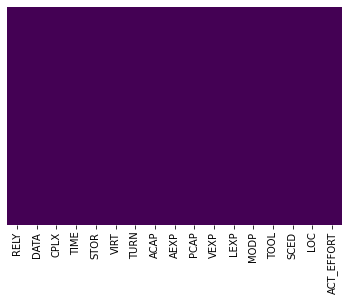

In [8]:
import seaborn as sns

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')  #Checking how many missing values are there in it

In [9]:
X=df.drop('ACT_EFFORT',axis=1)
y=df['ACT_EFFORT']

# define scalar values

In [10]:
a   =1
b   =2
c   =3
d   =4
e   =5
f   =6
g   =7
h   =8
i   =9
j   =10
k   =11
l   =12
m   =13
n   =14  
o   =15
p   =16
q   =17

# create DataFrame by transforming scalar values to list

In [11]:
df = pd.DataFrame({'RELY': [a],'DATA': [b],'CPLX': [c], 'TIME':[d], 'STOR' :[e], 'VIRT' : [f], 'TURN': [g],'ACAP' : [h], 'AEXP': [i], 'PCAP': [j],'VEXP' : [k], 'LEXP': [l],'MODP': [m], 'TOOL': [n], 'SCED':[o], 'LOC':[p], 'ACT_EFFORT':[q]})

In [12]:
df

,RELY,DATA,CPLX,TIME,STOR,VIRT,TURN,ACAP,AEXP,PCAP,VEXP,LEXP,MODP,TOOL,SCED,LOC,ACT_EFFORT
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17


In [ ]:
X

In [ ]:
y

In [13]:
#get the locations    #Captical X called Matric       #indep
# X = df[['RELY', 'DATA', 'CPLX', 'TIME', 'STOR', 'VIRT', 'TURN', 'ACAP', 'AEXP',
#        'PCAP', 'VEXP', 'LEXP', 'MODP', 'TOOL', 'SCED', 'LOC']]
 
#y vector
# y = df[['ACT_EFFORT']]   #dep

# Split train/test data

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [15]:
X.shape

(60, 16)

In [16]:
# X.drop("ACT_EFFORT",axis=1, inplace=True)

In [37]:
y.shape

(60,)

In [18]:
X.head()

,RELY,DATA,CPLX,TIME,STOR,VIRT,TURN,ACAP,AEXP,PCAP,VEXP,LEXP,MODP,TOOL,SCED,LOC
0,2,0,4,2,2,1,2,0,1,2,1,2,0,2,1,70.0
1,3,0,1,3,3,2,2,2,2,2,2,0,0,0,1,227.0
2,2,0,1,3,1,1,0,0,1,0,1,0,0,2,1,177.9
3,0,1,1,2,2,1,1,1,1,1,2,0,0,2,1,115.8
4,0,1,1,2,2,1,1,1,1,1,2,0,0,2,1,29.5


# LinearRegression

    Actual  LR Predicted
0    278.0   -105.172603
5     60.0     96.291757
36   360.0    316.625206
45  2400.0   2117.672908
13    42.0     29.916773
54   400.0    378.861863
33   324.0   1190.841278
48   370.0    590.270129
12    60.0     61.688054
57   571.4    415.061046
46  3240.0   2623.632154
50   420.0    549.458299


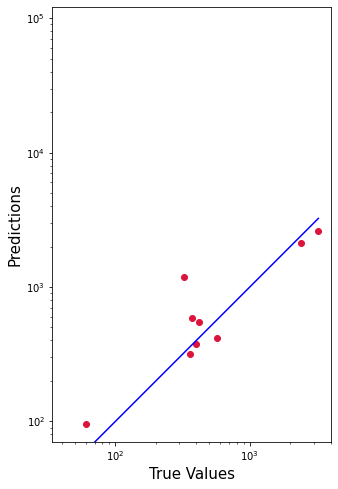

In [19]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
lr_model=LinearRegression()
lr_model.fit(X_train,y_train) #training algorithm

#it’s time to make some predictions.
#we will use our test data and see how accurately our algorithm predicts the percentage score.
predicted_value=lr_model.predict(X_test)
true_value=y_test

comparison = pd.DataFrame({'Actual':true_value,'LR Predicted':predicted_value})
print(comparison)


plt.figure(figsize=(5,8))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Gradient Boosting

    Actual  GB Predicted
0    278.0    322.182581
5     60.0     88.161130
36   360.0    340.567209
45  2400.0   1092.753024
13    42.0     42.653848
54   400.0    304.888609
33   324.0    631.513813
48   370.0    253.435186
12    60.0     71.025033
57   571.4    374.465767
46  3240.0   2145.993252
50   420.0   1559.552469


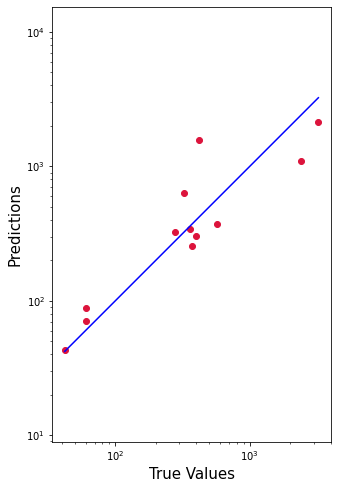

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model=GradientBoostingRegressor()
gb_model.fit(X_train,y_train)
gb_model.score(X_test,y_test)
predicted_value=gb_model.predict(X_test)
true_value=y_test

comparison = pd.DataFrame({'Actual':true_value,'GB Predicted':predicted_value})
print(comparison)

plt.figure(figsize=(5,8))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Random Forest

    Actual  RF Predicted
0    278.0      385.7804
5     60.0      110.8620
36   360.0      413.3120
45  2400.0     1274.3100
13    42.0       39.2600
54   400.0      314.3380
33   324.0     1039.5100
48   370.0      261.8920
12    60.0       67.0020
57   571.4      322.8080
46  3240.0     1957.5700
50   420.0     1434.6000


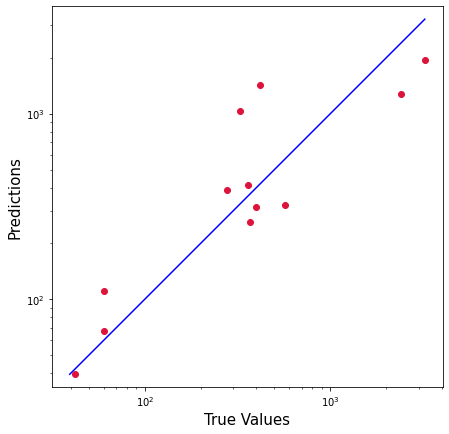

In [21]:
# from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=43)      
rf_model = rf_model.fit(X_train,y_train)
rf_model.score(X_test,y_test)

predicted_value=rf_model.predict(X_test)
true_value=y_test

comparison = pd.DataFrame({'Actual':true_value,'RF Predicted':predicted_value})
print(comparison)


plt.figure(figsize=(7,7))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Decision Tree Regression

    Actual  DT Predicted
0    278.0         750.0
5     60.0         117.6
36   360.0         360.0
45  2400.0         973.0
13    42.0          42.0
54   400.0         750.0
33   324.0        1248.0
48   370.0         215.0
12    60.0          90.0
57   571.4         252.0
46  3240.0        2120.0
50   420.0         815.0


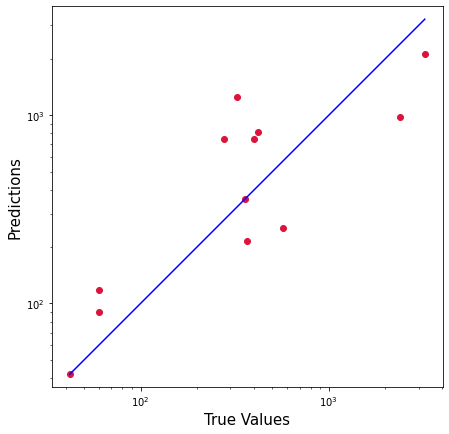

In [22]:
from sklearn.tree import DecisionTreeRegressor
D_model=DecisionTreeRegressor(max_depth=12)
D_model.fit(X_train,y_train)
D_model.score(X_test,y_test)
predicted_value=D_model.predict(X_test)
true_value=y_test

comparison = pd.DataFrame({'Actual':true_value,'DT Predicted':predicted_value})
print(comparison)


plt.figure(figsize=(7,7))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Plotting

In [23]:
lr_score=lr_model.score(X_test,y_test)
gb_score=gb_model.score(X_test,y_test)
rf_score=rf_model.score(X_test,y_test)
d_score=D_model.score(X_test,y_test)


Score=pd.DataFrame({'Linear Regression ':[lr_score],'Gradient Boosting':[gb_score],'Random Forest':[rf_score],'Decision Tree':[d_score]})
Score

,Linear Regression,Gradient Boosting,Random Forest,Decision Tree
0,0.871803,0.614573,0.598008,0.578136


In [24]:
names=[]

for i in Score.columns:
    names.append(i)

<BarContainer object of 4 artists>

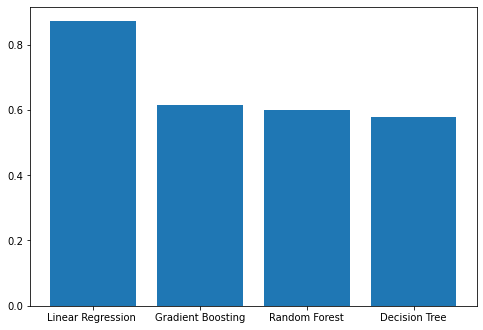

In [25]:
plt.rcParams["figure.figsize"] = (8,5.5)
plt.bar(names,Score.iloc[0].values)

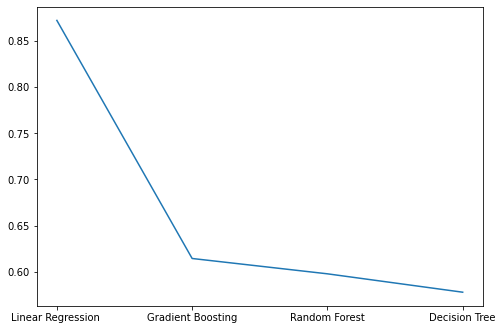

In [26]:
plt.plot(names,Score.iloc[0].values)

# R2

In [27]:
lr_score=lr_model.score(X_test,y_test)
gb_score=gb_model.score(X_test,y_test)
rf_score=rf_model.score(X_test,y_test)
d_score=D_model.score(X_test,y_test)

In [28]:
lr_pred=lr_model.predict(X_test)
gb_pred=gb_model.predict(X_test)
rf_pred=rf_model.predict(X_test)
d_pred=D_model.predict(X_test)

In [29]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [30]:
lr_r2_score=r2_score(y_test, lr_pred)
gb_r2_score=r2_score(y_test,gb_pred)
rf_r2_score=r2_score(y_test,rf_pred)
d_r2_score=r2_score(y_test,d_pred)

In [31]:
r2_Score=pd.DataFrame({'Linear Regression ':[lr_r2_score],'Gradient Boosting Tree':[gb_r2_score],'Random Forest':[rf_r2_score],'Decision Tree':[d_r2_score]})
r2_Score

,Linear Regression,Gradient Boosting Tree,Random Forest,Decision Tree
0,0.871803,0.614573,0.598008,0.578136


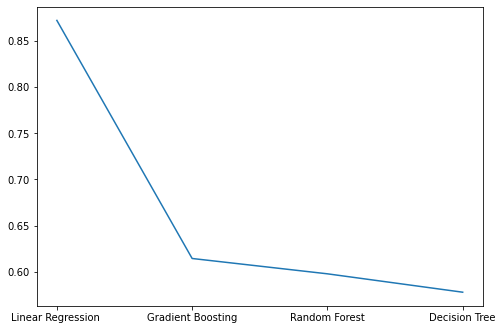

In [32]:
plt.plot(names,r2_Score.iloc[0].values)

# RMSE (Root Mean Square Error)

In [33]:
lr_rmse=np.sqrt(mean_squared_error(lr_pred, y_test))
gb_rmse=np.sqrt(mean_squared_error(gb_pred, y_test))
rf_rmse=np.sqrt(mean_squared_error(rf_pred, y_test))
d_rmse=np.sqrt(mean_squared_error(d_pred, y_test))

In [34]:
rmse=pd.DataFrame({'Linear Regression ':[lr_rmse],'Gradient Boosting Tree':[gb_rmse],'Random Forest':[rf_rmse],'Decision Tree':[d_rmse]})
rmse

,Linear Regression,Gradient Boosting Tree,Random Forest,Decision Tree
0,347.774752,603.016817,615.839398,630.877241


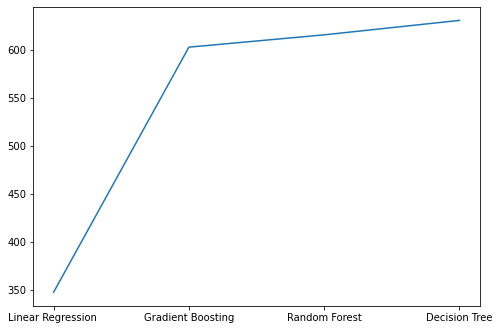

In [35]:
plt.plot(names,rmse.iloc[0].values)